<a href="https://colab.research.google.com/github/Meenakshipooranik/NBA-Data-Analysis/blob/main/nba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

player_id,
name,
height,
weight,
wingspan,
vertical_leap,
agility_time

In [1]:
!pip install <package_name> # Replace <package_name> with the desired SQL package name

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install <package_name> # Replace <package_name> with the desired SQL package name'


In [2]:
!pip install SQLalchemy==1.3.23

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SQLalchemy: filename=SQLAlchemy-1.3.23-cp310-cp310-linux_x86_64.whl size=1250457 sha256=5d9e610ca9ffc085a31d730c7da398b724046ca0776df7930f51bd007d76ca04
  Stored in directory: /root/.cache/pip/wheels/6b/bd/5f/b63dc9976fc54a34ac2019fdbef4eb6a15aef4958298ce4b55
Successfully built SQLalchemy
  Attempting uninstall: SQLalchemy
    Found existing installation: SQLAlchemy 2.0.32
    Uninstalling SQLAlchemy-2.0.32:
      Successfully uninstalled SQLAlchemy-2.0.32
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.14.0 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 1.3.23 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.23 which is incompatible.


In [3]:
!pip install ipython-sql

  Using cached SQLAlchemy-2.0.32-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.6 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached SQLAlchemy-2.0.32-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.23
    Uninstalling SQLAlchemy-1.3.23:
      Successfully uninstalled SQLAlchemy-1.3.23


**Load sql extension**

In [4]:
%load_ext sql

In [5]:
import sqlite3
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score



connect to colab

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%sql sqlite://///content/drive/MyDrive/nba/nba.sqlite

In [8]:
db_path='/content/drive/MyDrive/nba/nba.sqlite'

In [9]:
# Connect to SQLite database
conn = sqlite3.connect(db_path)


# Get a cursor
cursor = conn.cursor()


# Query to fetch table names
query = "SELECT name FROM sqlite_master WHERE type='table';"


In [10]:
# Execute the query and fetch table names
cursor.execute(query)
tables = cursor.fetchall()
print(tables)

[('game',), ('game_summary',), ('other_stats',), ('officials',), ('inactive_players',), ('game_info',), ('line_score',), ('play_by_play',), ('player',), ('team',), ('common_player_info',), ('team_details',), ('team_history',), ('draft_combine_stats',), ('draft_history',), ('team_info_common',)]


In [11]:
# uses SQL notebook magic followed by an arbirtrary SQL command
df_draft_combine_stats = %sql select * from draft_combine_stats
df_draft_combine_stats = df_draft_combine_stats.DataFrame() # transform magic response to Pandas DataFrame
df_draft_combine_stats.head() # display first five rows of resultant DataFrame

 * sqlite://///content/drive/MyDrive/nba/nba.sqlite
Done.


,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,2000,2124,Malik,Allen,Malik Allen,PF-C,80.25,6' 8.25'',NaN,None,...,None,None,None,None,None,None,None,None,None,None
1,2000,12019,Harold,Arceneaux,Harold Arceneaux,SG-SF,76.50,6' 4.5'',NaN,None,...,None,None,None,None,None,None,None,None,None,None
2,2000,12020,Lamont,Barnes,Lamont Barnes,PF-C,80.50,6' 8.5'',NaN,None,...,None,None,None,None,None,None,None,None,None,None
3,2000,12131,Mario,Bland,Mario Bland,PF,77.50,6' 5.5'',NaN,None,...,None,None,None,None,None,None,None,None,None,None
4,2000,2056,Primoz,Brezec,Primoz Brezec,C,84.75,7' 0.75'',NaN,None,...,None,None,None,None,None,None,None,None,None,None


In [12]:
print(df_draft_combine_stats.describe())

       height_wo_shoes  height_w_shoes     wingspan  standing_reach  \
count      1575.000000     1205.000000  1575.000000      1574.00000   
mean         77.600444       78.788963    82.402286       103.50899   
std           3.356327        3.301766     4.006972         4.87840   
min          67.750000       69.000000    70.000000        88.50000   
25%          75.250000       76.500000    79.750000       100.00000   
50%          77.750000       79.000000    82.500000       104.00000   
75%          80.125000       81.250000    85.250000       107.00000   
max          89.250000       91.000000    98.250000       122.50000   

       standing_vertical_leap  max_vertical_leap  lane_agility_time  \
count             1396.000000        1396.000000        1387.000000   
mean                29.254835          34.521490          11.413857   
std                  3.099532           3.704144           0.598113   
min                 19.500000          21.000000           9.650000   
25%  

In [13]:
%%sql
SELECT * FROM draft_combine_stats LIMIT 10;

 * sqlite://///content/drive/MyDrive/nba/nba.sqlite
Done.


season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,weight,wingspan,wingspan_ft_in,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,modified_lane_agility_time,three_quarter_sprint,bench_press,spot_fifteen_corner_left,spot_fifteen_break_left,spot_fifteen_top_key,spot_fifteen_break_right,spot_fifteen_corner_right,spot_college_corner_left,spot_college_break_left,spot_college_top_key,spot_college_break_right,spot_college_corner_right,spot_nba_corner_left,spot_nba_break_left,spot_nba_top_key,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
2000,2124,Malik,Allen,Malik Allen,PF-C,80.25,6' 8.25'',None,None,271,86.5,7' 2.5'',109.0,9' 1'',None,None,None,25.5,29.0,11.83,None,3.38,13.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2000,12019,Harold,Arceneaux,Harold Arceneaux,SG-SF,76.5,6' 4.5'',None,None,219,80.5,6' 8.5'',103.0,8' 7'',None,None,None,None,29.0,13.8,None,None,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2000,12020,Lamont,Barnes,Lamont Barnes,PF-C,80.5,6' 8.5'',None,None,235.5,87.5,7' 3.5'',108.0,9' 0'',None,None,None,28.0,29.5,12.3,None,3.4,10.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2000,12131,Mario,Bland,Mario Bland,PF,77.5,6' 5.5'',None,None,287,84.0,7' 0'',103.0,8' 7'',None,None,None,27.0,31.0,13.04,None,3.47,15.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2000,2056,Primoz,Brezec,Primoz Brezec,C,84.75,7' 0.75'',None,None,243,86.0,7' 2'',110.0,9' 2'',None,None,None,26.0,29.5,11.53,None,3.55,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2000,2081,Ernest,Brown,Ernest Brown,C,82.0,6' 10'',None,None,222.5,85.25,7' 1.25'',109.5,9' 1.5'',None,None,None,None,None,None,None,None,2.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2000,2049,Speedy,Claxton,Speedy Claxton,PG,70.5,5' 10.5'',None,None,166,72.0,6' 0'',94.5,7' 10.5'',None,None,None,36.0,42.5,10.48,None,3.06,6.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2000,12132,Eric,Coley,Eric Coley,SG-SF,76.0,6' 4'',None,None,205,83.0,6' 11'',102.0,8' 6'',None,None,None,35.0,38.0,11.4,None,3.15,10.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2000,12133,Ed,Cota,Ed Cota,PG,72.25,6' 0.25'',None,None,189,76.0,6' 4'',96.5,8' 0.5'',None,None,None,26.5,33.5,10.98,None,3.24,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2000,12134,Schea,Cotton,Schea Cotton,SF,76.25,6' 4.25'',None,None,219.5,79.0,6' 7'',100.0,8' 4'',None,None,None,34.0,38.0,11.55,None,3.0,19.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


 List All Combine Stats

In [14]:
query = "SELECT * FROM draft_combine_stats;"
combine_stats_df = pd.read_sql_query(query, conn)
print(combine_stats_df.head())

  season player_id first_name  last_name       player_name position  \
0   2000      2124      Malik      Allen       Malik Allen     PF-C   
1   2000     12019     Harold  Arceneaux  Harold Arceneaux    SG-SF   
2   2000     12020     Lamont     Barnes     Lamont Barnes     PF-C   
3   2000     12131      Mario      Bland       Mario Bland       PF   
4   2000      2056     Primoz     Brezec     Primoz Brezec        C   

   height_wo_shoes height_wo_shoes_ft_in  height_w_shoes height_w_shoes_ft_in  \
0            80.25             6' 8.25''             NaN                 None   
1            76.50              6' 4.5''             NaN                 None   
2            80.50              6' 8.5''             NaN                 None   
3            77.50              6' 5.5''             NaN                 None   
4            84.75             7' 0.75''             NaN                 None   

   ... spot_nba_break_right  spot_nba_corner_right  \
0  ...                 None     

# **Data Cleaning**

In [15]:
query = "SELECT season,player_name,position,height_wo_shoes,weight,wingspan,standing_vertical_leap,max_vertical_leap,lane_agility_time FROM draft_combine_stats;"
df_draft_combine_stats = pd.read_sql_query(query, conn)
print(df_draft_combine_stats.head())

  season       player_name position  height_wo_shoes weight  wingspan  \
0   2000       Malik Allen     PF-C            80.25    271      86.5   
1   2000  Harold Arceneaux    SG-SF            76.50    219      80.5   
2   2000     Lamont Barnes     PF-C            80.50  235.5      87.5   
3   2000       Mario Bland       PF            77.50    287      84.0   
4   2000     Primoz Brezec        C            84.75    243      86.0   

   standing_vertical_leap  max_vertical_leap  lane_agility_time  
0                    25.5               29.0              11.83  
1                     NaN               29.0              13.80  
2                    28.0               29.5              12.30  
3                    27.0               31.0              13.04  
4                    26.0               29.5              11.53  


In [16]:
# Fill None values with 0 for numerical columns
df_draft_combine_stats['height_wo_shoes'] = df_draft_combine_stats['height_wo_shoes'].fillna(0)
df_draft_combine_stats['weight'] = df_draft_combine_stats['weight'].fillna(0)

# Fill None values with 'Unknown' for string columns
df_draft_combine_stats['player_name'] = df_draft_combine_stats['player_name'].fillna('Unknown')


In [26]:
# Fill None values with the previous non-null value in the column
df_draft_combine_stats['lane_agility_time'] = df_draft_combine_stats['lane_agility_time'].fillna(df_draft_combine_stats['lane_agility_time'].mode()[0])



In [27]:
# Calculate the median of the 'standing_vertical_leap' column, ignoring NaN values
median_standing_leap = df_draft_combine_stats['standing_vertical_leap'].median()
median_max_vertical_leap = df_draft_combine_stats['max_vertical_leap'].median()
median_wingspan = df_draft_combine_stats['wingspan'].median()
# Fill NaN values in 'standing_vertical_leap' with the calculated median
df_draft_combine_stats['standing_vertical_leap'].fillna(median_standing_leap, inplace=True)
df_draft_combine_stats['max_vertical_leap'].fillna(median_max_vertical_leap, inplace=True)
df_draft_combine_stats['wingspan'].fillna(median_wingspan, inplace=True)

In [28]:
df_draft_combine_stats.head()

,season,player_name,position,height_wo_shoes,weight,wingspan,standing_vertical_leap,max_vertical_leap,lane_agility_time
0,2000,Malik Allen,PF-C,80.25,271,86.5,25.5,29.0,11.83
1,2000,Harold Arceneaux,SG-SF,76.50,219,80.5,29.0,29.0,13.80
2,2000,Lamont Barnes,PF-C,80.50,235.5,87.5,28.0,29.5,12.30
3,2000,Mario Bland,PF,77.50,287,84.0,27.0,31.0,13.04
4,2000,Primoz Brezec,C,84.75,243,86.0,26.0,29.5,11.53


In [29]:
df_draft_combine_stats.isnull().sum()

,0
season,0
player_name,0
position,0
height_wo_shoes,0
weight,0
wingspan,0
standing_vertical_leap,0
max_vertical_leap,0
lane_agility_time,0


# **Exploratory Data Analysis**

Get Average Height and Weight

In [30]:
# Average height and weight
avg_height_weight_df = pd.read_sql_query("""
SELECT AVG(height_wo_shoes) AS avg_height, AVG(weight) AS avg_weight
FROM draft_combine_stats;
""", conn)
print(avg_height_weight_df)

   avg_height  avg_weight
0   77.600444  215.254828


In [31]:
df_draft_combine_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  1633 non-null   object 
 1   player_name             1633 non-null   object 
 2   position                1633 non-null   object 
 3   height_wo_shoes         1633 non-null   float64
 4   weight                  1633 non-null   object 
 5   wingspan                1633 non-null   float64
 6   standing_vertical_leap  1633 non-null   float64
 7   max_vertical_leap       1633 non-null   float64
 8   lane_agility_time       1633 non-null   float64
dtypes: float64(5), object(4)
memory usage: 114.9+ KB


**Top 10 players by vertical leap**

In [32]:
# Top 10 players by vertical leap
top_vertical_leap_df = pd.read_sql_query("""
SELECT player_name, max_vertical_leap
FROM draft_combine_stats
ORDER BY max_vertical_leap DESC
LIMIT 10;
""", conn)
print(top_vertical_leap_df)

       player_name  max_vertical_leap
0     Keon Johnson               48.0
1    Kenny Gregory               45.5
2   Hamidou Diallo               44.5
3     Jericho Sims               44.5
4     Shane Larkin               44.0
5  Pat Connaughton               44.0
6       Kay Felder               44.0
7  Cassius Stanley               44.0
8       Tim Bowers               43.5
9    Nate Robinson               43.5


**Players with best agility time**

In [153]:
# Players with best agility time
best_agility_time_df = pd.read_sql_query("""
SELECT player_name, lane_agility_time
FROM draft_combine_stats
ORDER BY lane_agility_time ASC;
""", conn)
print(best_agility_time_df)

           player_name  lane_agility_time
0         Ernest Brown                NaN
1       Jamal Crawford                NaN
2      Ceedric Goodwyn                NaN
3        Brandon Kurtz                NaN
4       Gilbert Arenas                NaN
...                ...                ...
1628      Keith Gallon              13.44
1629     Ian Vouyoukas              13.70
1630  Harold Arceneaux              13.80
1631        James Lang              14.01
1632       Uche Okafor              14.45

[1633 rows x 2 columns]


In [154]:
best_agility_time_df.isna().sum()

,0
player_name,0
lane_agility_time,246


In [155]:
# Fill with mean
best_agility_time_df['lane_agility_time'] = best_agility_time_df['lane_agility_time'].fillna(best_agility_time_df['lane_agility_time'].mean())

In [156]:
best_agility_time_df.isna().sum()

,0
player_name,0
lane_agility_time,0


In [157]:
best_agility_time_df

,player_name,lane_agility_time
0,Ernest Brown,11.413857
1,Jamal Crawford,11.413857
2,Ceedric Goodwyn,11.413857
3,Brandon Kurtz,11.413857
4,Gilbert Arenas,11.413857
...,...,...
1628,Keith Gallon,13.440000
1629,Ian Vouyoukas,13.700000
1630,Harold Arceneaux,13.800000
1631,James Lang,14.010000


**Bar chart for top 10 players by vertical leap**

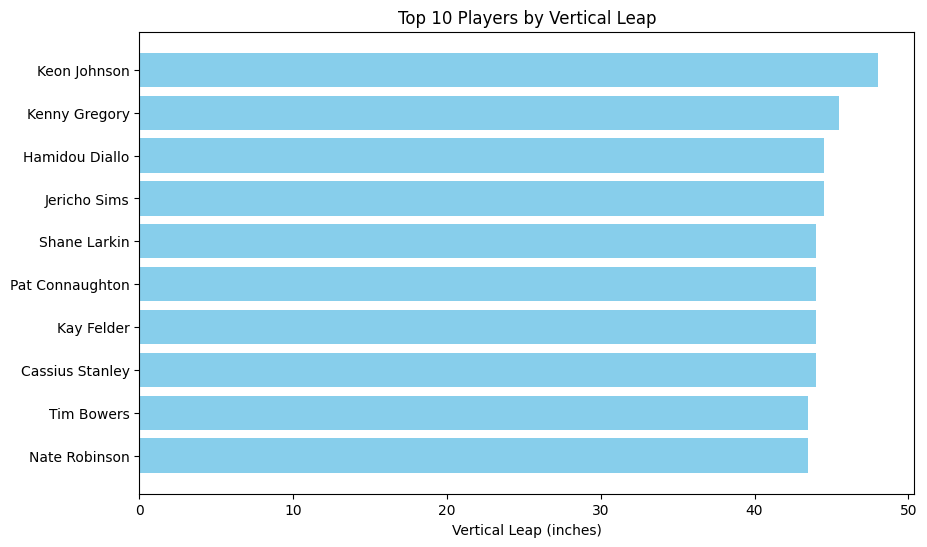

In [40]:
# Bar chart for top 10 players by vertical leap
plt.figure(figsize=(10, 6))
plt.barh(top_vertical_leap_df['player_name'], top_vertical_leap_df['max_vertical_leap'], color='skyblue')
plt.xlabel('Vertical Leap (inches)')
plt.title('Top 10 Players by Vertical Leap')
plt.gca().invert_yaxis()
plt.show()

**Bar chart for players with best agility time**

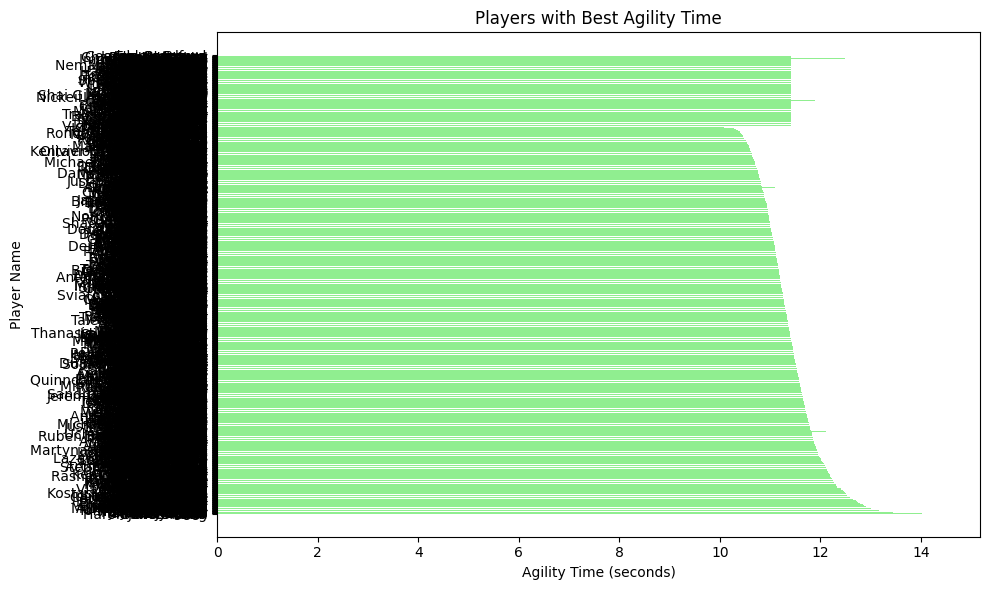

In [158]:
# Bar chart for players with best agility time
plt.figure(figsize=(10,6))
plt.barh(best_agility_time_df['player_name'], best_agility_time_df['lane_agility_time'], color='lightgreen')
plt.xlabel('Agility Time (seconds)')
plt.ylabel('Player Name')
plt.title('Players with Best Agility Time')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**standing vertical leap vs. max vertical leap**

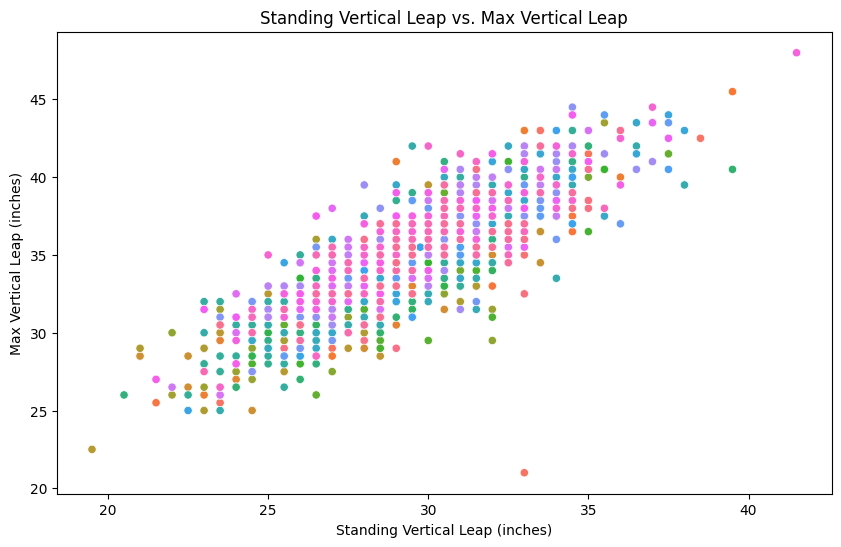

In [42]:
# Scatter plot for standing vertical leap vs. max vertical leap
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_draft_combine_stats, x='standing_vertical_leap', y='max_vertical_leap', hue='player_name', legend=False)
plt.title('Standing Vertical Leap vs. Max Vertical Leap')
plt.xlabel('Standing Vertical Leap (inches)')
plt.ylabel('Max Vertical Leap (inches)')
plt.show()

**Distribution of Player Heights**

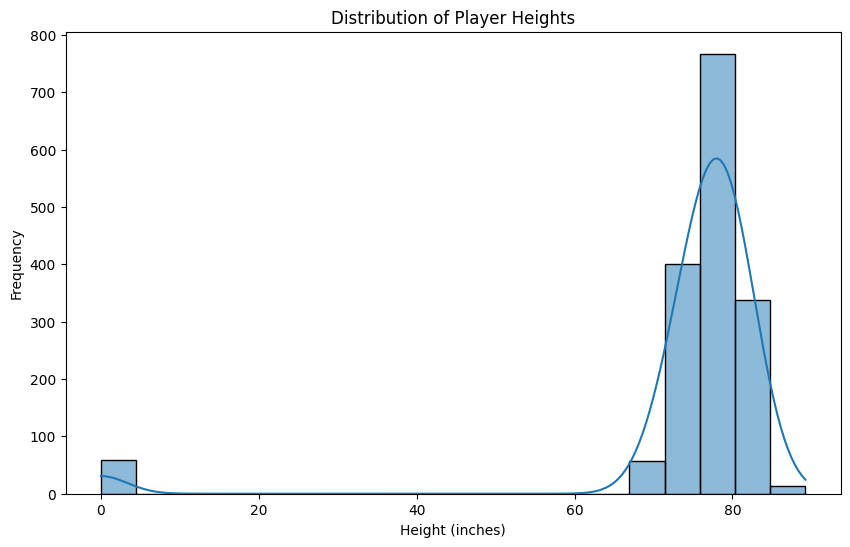

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for player heights
plt.figure(figsize=(10, 6))
sns.histplot(df_draft_combine_stats['height_wo_shoes'], bins=20, kde=True)
plt.title('Distribution of Player Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

In [44]:
df_draft_combine_stats.columns

Index(['season', 'player_name', 'position', 'height_wo_shoes', 'weight',
       'wingspan', 'standing_vertical_leap', 'max_vertical_leap',
       'lane_agility_time'],
      dtype='object')

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# One-hot encode the position column
performance = pd.get_dummies(df_draft_combine_stats, columns=['position'], drop_first=True)

# Select features and target variable
X = performance[['max_vertical_leap','height_wo_shoes', 'wingspan', 'standing_vertical_leap']]

y = performance['lane_agility_time']  # Replace with your target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fill empty strings with NaN
X_train.replace('', pd.NA, inplace=True)
X_test.replace('', pd.NA, inplace=True)

X_train.dropna(inplace=True)
X_test.dropna(inplace=True)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ... (Your code to load 'performance' DataFrame and preprocess data)

# Select features and target variable (assuming you've already handled missing values)
X = performance[['max_vertical_leap','height_wo_shoes', 'wingspan', 'standing_vertical_leap']]
y = performance['lane_agility_time']

# Convert features and target to numeric, handling errors
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, replacing non-numeric with NaN
y = pd.to_numeric(y, errors='coerce')

# Drop rows with missing values after conversion
X.dropna(inplace=True)
y.dropna(inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.23390320486539468
R-squared: 0.2581887999413186


Top 10 Teams

In [51]:
df_game = %sql select * from game
df_game = df_game.DataFrame() # transform magic response to Pandas DataFrame
df_game.head() # display first five rows of resultant DataFrame


 * sqlite://///content/drive/MyDrive/nba/nba.sqlite
Done.


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,0024600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,0024600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,0024600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,0024600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,0024600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


season id,

In [52]:
df_game.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')

In [53]:
df_line_score = %sql select * from line_score
df_line_score = df_line_score.DataFrame() # transform magic response to Pandas DataFrame
df_line_score.head() # display first five rows of resultant DataFrame


 * sqlite://///content/drive/MyDrive/nba/nba.sqlite
Done.


,game_date_est,game_sequence,game_id,team_id_home,team_abbreviation_home,team_city_name_home,team_nickname_home,team_wins_losses_home,pts_qtr1_home,pts_qtr2_home,...,pts_ot2_away,pts_ot3_away,pts_ot4_away,pts_ot5_away,pts_ot6_away,pts_ot7_away,pts_ot8_away,pts_ot9_away,pts_ot10_away,pts_away
0,1946-11-01 00:00:00,NaN,0024600001,1610610035,HUS,Toronto,Huskies,-,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0
1,1946-11-02 00:00:00,NaN,0024600003,1610610034,BOM,St. Louis,Bombers,-,16,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0
2,1946-11-02 00:00:00,NaN,0024600002,1610612738,BOS,Boston,Celtics,-,10.0,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
3,1946-11-02 00:00:00,NaN,0024600004,1610610025,CHS,Chicago,Stags,-,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
4,1946-11-02 00:00:00,NaN,0024600005,1610610036,WAS,Washington,Capitols,-,21,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0


In [54]:
df_line_score.columns

Index(['game_date_est', 'game_sequence', 'game_id', 'team_id_home',
       'team_abbreviation_home', 'team_city_name_home', 'team_nickname_home',
       'team_wins_losses_home', 'pts_qtr1_home', 'pts_qtr2_home',
       'pts_qtr3_home', 'pts_qtr4_home', 'pts_ot1_home', 'pts_ot2_home',
       'pts_ot3_home', 'pts_ot4_home', 'pts_ot5_home', 'pts_ot6_home',
       'pts_ot7_home', 'pts_ot8_home', 'pts_ot9_home', 'pts_ot10_home',
       'pts_home', 'team_id_away', 'team_abbreviation_away',
       'team_city_name_away', 'team_nickname_away', 'team_wins_losses_away',
       'pts_qtr1_away', 'pts_qtr2_away', 'pts_qtr3_away', 'pts_qtr4_away',
       'pts_ot1_away', 'pts_ot2_away', 'pts_ot3_away', 'pts_ot4_away',
       'pts_ot5_away', 'pts_ot6_away', 'pts_ot7_away', 'pts_ot8_away',
       'pts_ot9_away', 'pts_ot10_away', 'pts_away'],
      dtype='object')

In [55]:
df_game.isna().sum()

,0
season_id,0
team_id_home,0
team_abbreviation_home,0
team_name_home,0
game_id,0
game_date,0
matchup_home,0
wl_home,2
min,0
fgm_home,13


In [56]:
df_team_home=pd.read_sql_query("""
    SELECT
        team_abbreviation_home,
        team_name_home,
        COUNT(CASE WHEN wl_home = 'W' THEN 1 END) AS wins,
        COUNT(*) AS total_games,COUNT(CASE WHEN wl_home = 'W' THEN 1 END)*1.0/COUNT(*) as win_ratio
    FROM game
    WHERE game_date >= '2003-01-01'
    GROUP BY team_abbreviation_home, team_name_home
    having total_games>200
    ORDER BY win_ratio DESC limit 10
""", conn)
df_team_home

,team_abbreviation_home,team_name_home,wins,total_games,win_ratio
0,SAS,San Antonio Spurs,681,945,0.720635
1,GSW,Golden State Warriors,618,914,0.676149
2,DEN,Denver Nuggets,588,885,0.664407
3,DAL,Dallas Mavericks,595,904,0.658186
4,UTA,Utah Jazz,572,875,0.653714
5,MIA,Miami Heat,612,954,0.641509
6,BOS,Boston Celtics,611,960,0.636458
7,HOU,Houston Rockets,565,901,0.627081
8,LAC,LA Clippers,228,366,0.622951
9,OKC,Oklahoma City Thunder,405,651,0.622120


In [57]:
df_team_away=pd.read_sql_query("""
    SELECT
        team_abbreviation_away,
        team_name_away,
        COUNT(CASE WHEN wl_away = 'W' THEN 1 END) AS wins,
        COUNT(*) AS total_games,COUNT(CASE WHEN wl_away = 'W' THEN 1 END)*1.0/COUNT(*) as win_ratio
    FROM game
    WHERE game_date >= '2003-01-01'
    GROUP BY team_abbreviation_away
    having total_games>200
    ORDER BY win_ratio DESC limit 10
""", conn)
df_team_away

,team_abbreviation_away,team_name_away,wins,total_games,win_ratio
0,SAS,San Antonio Spurs,503,938,0.536247
1,BOS,Boston Celtics,472,956,0.493724
2,DAL,Dallas Mavericks,447,914,0.489059
3,HOU,Houston Rockets,419,894,0.468680
4,PHX,Phoenix Suns,409,880,0.464773
5,OKC,Oklahoma City Thunder,296,646,0.458204
6,MIA,Miami Heat,425,938,0.453092
7,GSW,Golden State Warriors,414,921,0.449511
8,LAL,Los Angeles Lakers,388,884,0.438914
9,TOR,Toronto Raptors,381,879,0.433447


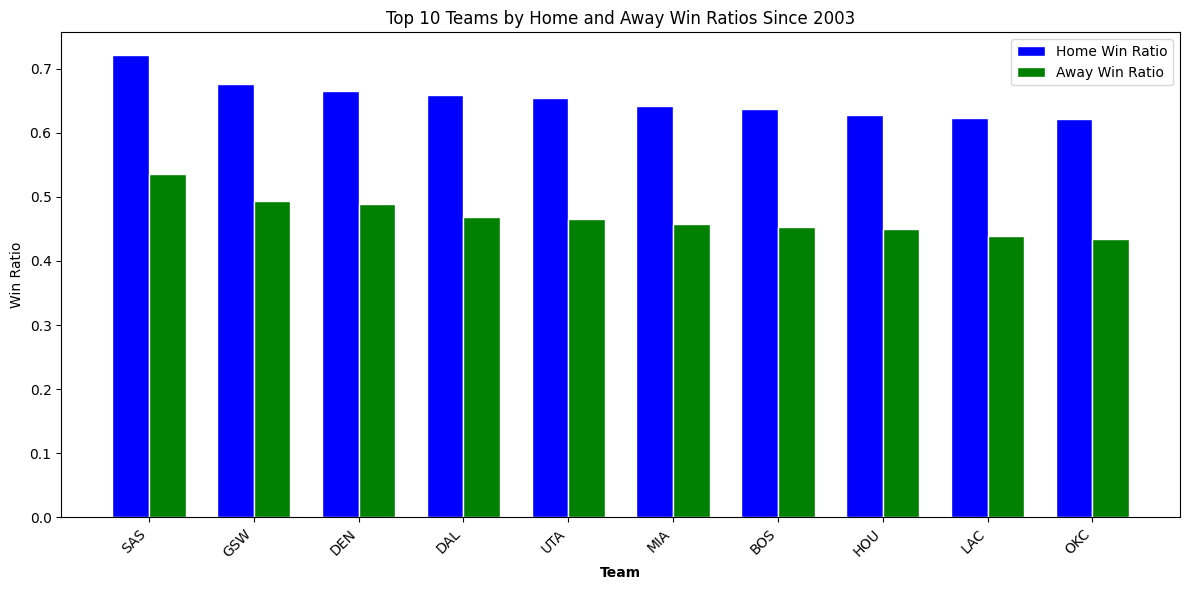

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_team_home and df_team_away have the same teams in the same order
teams = df_team_home['team_abbreviation_home']
home_win_ratios = df_team_home['win_ratio']
away_win_ratios = df_team_away['win_ratio']

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = np.arange(len(teams))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

# Make the plot
plt.bar(r1, home_win_ratios, color='blue', width=bar_width, edgecolor='white', label='Home Win Ratio')
plt.bar(r2, away_win_ratios, color='green', width=bar_width, edgecolor='white', label='Away Win Ratio')

# Add xticks on the middle of the group bars
plt.xlabel('Team', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(teams))], teams, rotation=45, ha='right')
plt.ylabel('Win Ratio')
plt.title('Top 10 Teams by Home and Away Win Ratios Since 2003')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
df=pd.read_sql_query("""
    with home as(SELECT
        team_abbreviation_home,
        team_name_home,
        COUNT(CASE WHEN wl_home = 'W' THEN 1 END) AS wins,
        COUNT(*) AS total_games,COUNT(CASE WHEN wl_home = 'W' THEN 1 END)*1.0/COUNT(*) as win_ratio
    FROM game
    WHERE game_date >= '2003-01-01' and season_type IN ('Regular Season', 'Playoff')
    GROUP BY team_abbreviation_home, team_name_home
    having total_games>200
    ORDER BY win_ratio DESC),
    nonhome as(SELECT
        team_abbreviation_away,
        team_name_away,
        COUNT(CASE WHEN wl_away = 'W' THEN 1 END) AS wins,
        COUNT(*) AS total_games,COUNT(CASE WHEN wl_away = 'W' THEN 1 END)*1.0/COUNT(*) as win_ratio
    FROM game
    WHERE game_date >= '2003-01-01' and season_type IN ('Regular Season', 'Playoff')
    GROUP BY team_abbreviation_away
    having total_games>200
    ORDER BY win_ratio DESC)

    select a.team_abbreviation_home,a.win_ratio as hwinratio,b.win_ratio as nhwinratio,(a.wins+b.wins)*1.0/(a.total_games+b.total_games)as winratio from home a join nonhome b on a.team_abbreviation_home = b.team_abbreviation_away order by winratio Desc limit 10
""", conn)

In [63]:
df

,team_abbreviation_home,hwinratio,nhwinratio,winratio
0,SAS,0.733418,0.552732,0.642903
1,DAL,0.671320,0.504436,0.587825
2,BOS,0.636943,0.505076,0.570884
3,DEN,0.667090,0.437817,0.552381
4,MIA,0.641677,0.455584,0.548571
5,GSW,0.656450,0.440051,0.548181
6,HOU,0.617048,0.478426,0.547649
7,OKC,0.617594,0.475676,0.546763
8,UTA,0.659466,0.425667,0.542567
9,PHX,0.589354,0.461146,0.525413


In [65]:
dTeam = pd.read_sql_query("select * from Game where team_abbreviation_home = 'SAS' and game_date >= '2003-01-01' and season_type IN ('Regular Season', 'Playoff') ",conn)
dTeam.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,22002,1610612759,SAS,San Antonio Spurs,0020200461,2003-01-03 00:00:00,SAS vs. GSW,W,240,36.0,...,50.0,18.0,5.0,6.0,19.0,25.0,95.0,-3,0,Regular Season
1,22002,1610612759,SAS,San Antonio Spurs,0020200526,2003-01-12 00:00:00,SAS vs. BOS,W,240,28.0,...,41.0,11.0,7.0,4.0,16.0,30.0,80.0,-1,0,Regular Season
2,22002,1610612759,SAS,San Antonio Spurs,0020200541,2003-01-14 00:00:00,SAS vs. PHX,W,265,37.0,...,51.0,15.0,8.0,6.0,11.0,30.0,100.0,-8,0,Regular Season
3,22002,1610612759,SAS,San Antonio Spurs,0020200560,2003-01-17 00:00:00,SAS vs. ATL,W,240,38.0,...,39.0,17.0,4.0,4.0,15.0,24.0,93.0,-13,0,Regular Season
4,22002,1610612759,SAS,San Antonio Spurs,0020200581,2003-01-20 00:00:00,SAS vs. HOU,W,240,32.0,...,49.0,20.0,9.0,5.0,14.0,20.0,82.0,-5,0,Regular Season


Top 10 Teams by Overall Win Ratio: Home vs Away (2003-2023)

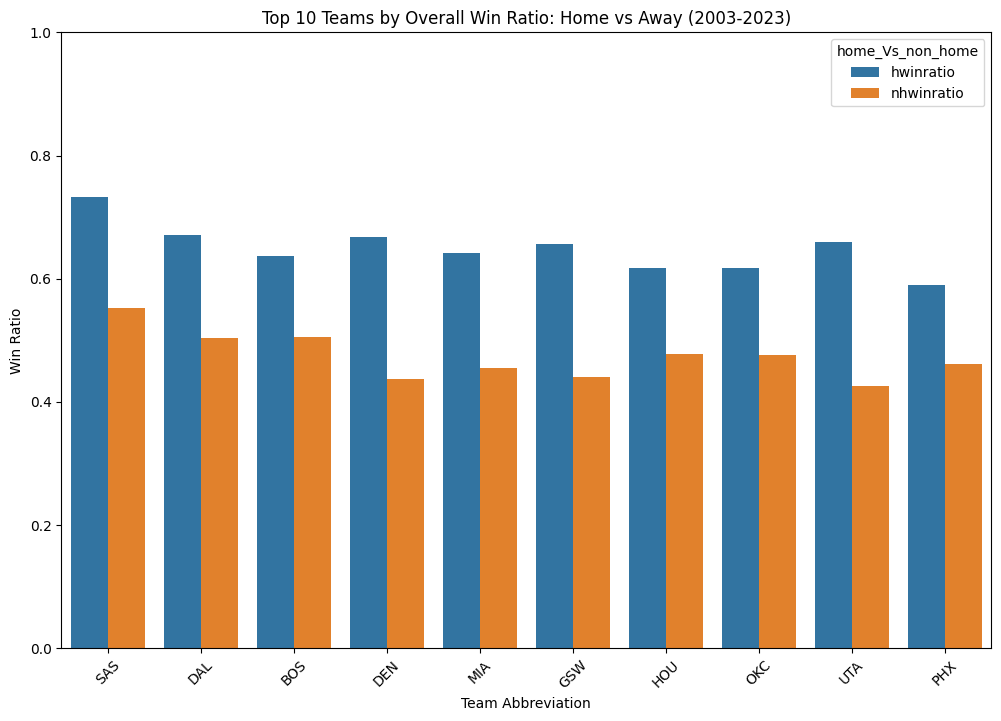

In [66]:
# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create a grouped barplot
df_melted = df.melt(id_vars="team_abbreviation_home", value_vars=["hwinratio", "nhwinratio"],
                    var_name="home_Vs_non_home", value_name="Win_Ratio")

# Plotting
sns.barplot(x="team_abbreviation_home", y="Win_Ratio", hue="home_Vs_non_home", data=df_melted)

# Add title and labels
plt.title("Top 10 Teams by Overall Win Ratio: Home vs Away (2003-2023)")
plt.xlabel("Team Abbreviation")
plt.ylabel("Win Ratio")
plt.ylim(0, 1)  # Optional: Set y-axis limits
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability

# Display the plot
plt.show()

In [134]:
dTeam = pd.read_sql_query("select * from Game where game_date >= '2003-01-01'",conn)

In [136]:
dTeam

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,22002,1610612737,ATL,Atlanta Hawks,0020200448,2003-01-01 00:00:00,ATL vs. MIA,L,240,25.0,...,39.0,21.0,18.0,3.0,12.0,19.0,107.0,34,0,Regular Season
1,22002,1610612752,NYK,New York Knicks,0020200449,2003-01-01 00:00:00,NYK vs. TOR,W,240,37.0,...,42.0,14.0,5.0,3.0,14.0,21.0,75.0,-20,0,Regular Season
2,22002,1610612741,CHI,Chicago Bulls,0020200450,2003-01-02 00:00:00,CHI vs. WAS,L,240,33.0,...,53.0,23.0,6.0,6.0,19.0,21.0,107.0,25,0,Regular Season
3,22002,1610612756,PHX,Phoenix Suns,0020200452,2003-01-02 00:00:00,PHX vs. PHI,W,240,38.0,...,33.0,24.0,8.0,4.0,16.0,21.0,78.0,-18,0,Regular Season
4,22002,1610612742,DAL,Dallas Mavericks,0020200451,2003-01-02 00:00:00,DAL vs. LAC,W,240,38.0,...,56.0,16.0,5.0,3.0,19.0,24.0,92.0,-10,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26752,42022,1610612748,MIA,Miami Heat,0042200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,...,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
26753,42022,1610612748,MIA,Miami Heat,0042200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,...,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
26754,42022,1610612743,DEN,Denver Nuggets,0042200405,2023-06-12 00:00:00,DEN vs. MIA,W,240,38.0,...,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
26755,32022,1610616834,LBN,Team LeBron,0032200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,...,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star


In [68]:
dTeam['win'] = dTeam['wl_home'].apply(lambda x: 1 if x == 'W' else 0)

In [69]:
dTeam['fg_pct_diff'] = dTeam['fg_pct_home'] - dTeam['fg_pct_away']
dTeam['fg3_pct_diff'] = dTeam['fg3_pct_home'] - dTeam['fg3_pct_away']
dTeam['reb_diff'] = dTeam['reb_home'] - dTeam['reb_away']
dTeam['ast_diff'] = dTeam['ast_home'] - dTeam['ast_away']
dTeam['tov_diff'] = dTeam['tov_home'] - dTeam['tov_away']
dTeam['blk_diff'] = dTeam['blk_home'] - dTeam['blk_away']
dTeam['stl_diff'] = dTeam['stl_home'] - dTeam['stl_away']

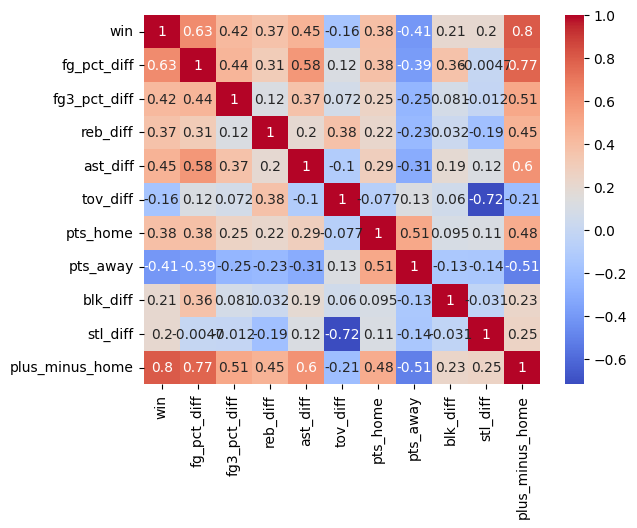

In [78]:
import seaborn as sns
correlation_matrix = dTeam[['win', 'fg_pct_diff', 'fg3_pct_diff', 'reb_diff', 'ast_diff', 'tov_diff','pts_home','pts_away','blk_diff','stl_diff','plus_minus_home']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [79]:
correlation_matrix

,win,fg_pct_diff,fg3_pct_diff,reb_diff,ast_diff,tov_diff,pts_home,pts_away,blk_diff,stl_diff,plus_minus_home
win,1.000000,0.625939,0.420378,0.365279,0.454214,-0.163581,0.383138,-0.408493,0.208347,0.204872,0.799818
fg_pct_diff,0.625939,1.000000,0.440902,0.306053,0.578444,0.119883,0.377545,-0.385807,0.363476,-0.004671,0.771133
fg3_pct_diff,0.420378,0.440902,1.000000,0.115560,0.365310,0.071872,0.254555,-0.247938,0.080643,-0.011728,0.507531
reb_diff,0.365279,0.306053,0.115560,1.000000,0.197006,0.375864,0.217312,-0.232358,0.032469,-0.191681,0.454325
ast_diff,0.454214,0.578444,0.365310,0.197006,1.000000,-0.103523,0.287852,-0.305294,0.191503,0.119404,0.599269
tov_diff,-0.163581,0.119883,0.071872,0.375864,-0.103523,1.000000,-0.077439,0.126494,0.059961,-0.717361,-0.206339
pts_home,0.383138,0.377545,0.254555,0.217312,0.287852,-0.077439,1.000000,0.510038,0.095361,0.110237,0.484360
pts_away,-0.408493,-0.385807,-0.247938,-0.232358,-0.305294,0.126494,0.510038,1.000000,-0.134428,-0.141150,-0.505478
blk_diff,0.208347,0.363476,0.080643,0.032469,0.191503,0.059961,0.095361,-0.134428,1.000000,-0.030566,0.232387
stl_diff,0.204872,-0.004671,-0.011728,-0.191681,0.119404,-0.717361,0.110237,-0.141150,-0.030566,1.000000,0.254146


In [72]:
dT = dTeam[['fg_pct_diff','fg3_pct_diff','reb_diff','ast_diff','tov_diff','win']]
dT.head()

,fg_pct_diff,fg3_pct_diff,reb_diff,ast_diff,tov_diff,win
0,-0.107,-0.453,-6.0,-4.0,13.0,0
1,0.098,0.186,0.0,11.0,-5.0,1
2,-0.165,0.108,-21.0,-5.0,-8.0,0
3,0.039,0.033,12.0,-2.0,1.0,1
4,0.054,-0.213,-12.0,3.0,-10.0,1


Training a model

In [81]:
X = dT.iloc[:,:-1].values

In [82]:
y = dT.iloc[:,-1].values

In [83]:
y

array([0, 1, 0, ..., 1, 0, 0])

In [84]:
y = dT.iloc[:,-1].valuesy = dT.iloc[:,-1].values

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 5)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_pred = lr.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [90]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2384,  362],
       [ 310, 3634]])

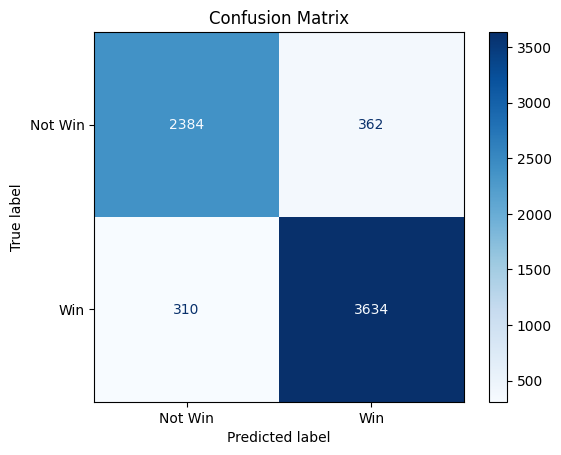

In [91]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Win', 'Win'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [92]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8995515695067264

Train a Classification Model

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8995515695067264
Confusion Matrix:
 [[2384  362]
 [ 310 3634]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      2746
           1       0.91      0.92      0.92      3944

    accuracy                           0.90      6690
   macro avg       0.90      0.89      0.90      6690
weighted avg       0.90      0.90      0.90      6690



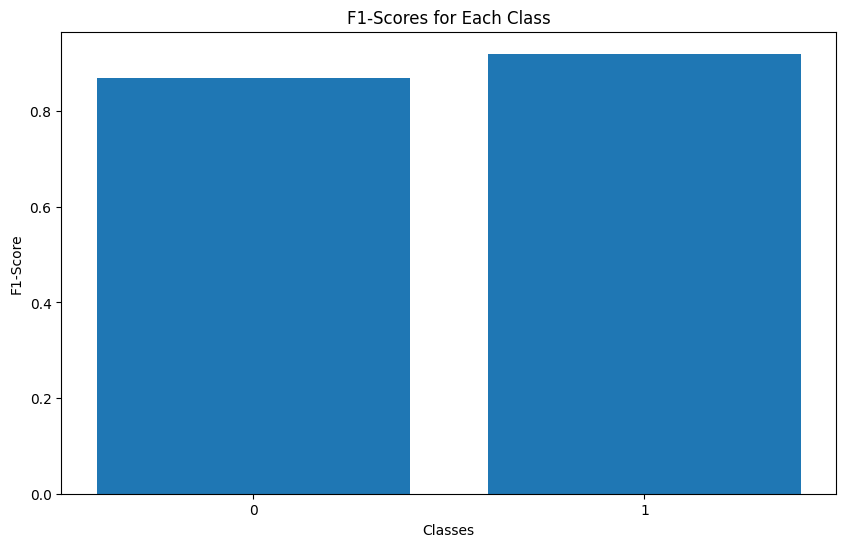

In [140]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# ... (Your model training and prediction code here, resulting in y_test and y_pred) ...

# Generate classification report
report = classification_report(y_test, y_pred)

# Extract class names and F1-scores
lines = report.split('\n')[2:-5]  # Adjust indices if report format differs
classes = []
f1_scores = []
for line in lines:
    parts = line.split()
    classes.append(parts[0])
    f1_scores.append(float(parts[2]))

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, f1_scores)
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Scores for Each Class')
plt.show()

RandomForestClassifier

In [138]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8923766816143498


In [124]:
query = """
SELECT
    team.full_name,
    AVG(line_score.pts_home) AS avg_points_scored,
    AVG(line_score.pts_away) AS avg_points_allowed,
    (AVG(line_score.pts_home) - AVG(line_score.pts_away)) AS avg_point_difference,
    game.game_date
FROM
    team
JOIN
    line_score ON team.id = line_score.team_id_home
JOIN
    game ON game.team_id_home=line_score.team_id_home
WHERE
    game.game_date >= '2003-01-01'

GROUP BY
    team.full_name
ORDER BY
    avg_points_scored DESC;
"""

# Load the data into a DataFrame
team_performance_df = pd.read_sql_query(query, conn)


In [125]:
team_performance_df

,full_name,avg_points_scored,avg_points_allowed,avg_point_difference,game_date
0,Phoenix Suns,107.734037,105.786846,1.947192,2003-01-02 00:00:00
1,Denver Nuggets,107.634763,107.848185,-0.213421,2003-01-04 00:00:00
2,Oklahoma City Thunder,105.731084,104.614458,1.116627,2003-01-03 00:00:00
3,Golden State Warriors,105.715328,105.457165,0.258164,2003-01-06 00:00:00
4,Los Angeles Lakers,105.342579,102.476012,2.866567,2003-01-05 00:00:00
5,Houston Rockets,104.976394,103.959819,1.016575,2003-01-04 00:00:00
6,Portland Trail Blazers,104.877984,103.780902,1.097082,2003-01-07 00:00:00
7,Milwaukee Bucks,104.677500,103.080500,1.597000,2003-01-03 00:00:00
8,San Antonio Spurs,104.667425,101.583286,3.084139,2003-01-03 00:00:00
9,Boston Celtics,104.614249,101.668882,2.945367,2003-01-03 00:00:00


<ipython-input-120-efcf9d773a1e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='full_name', y='avg_points_scored', data=team_performance_df, palette='viridis')


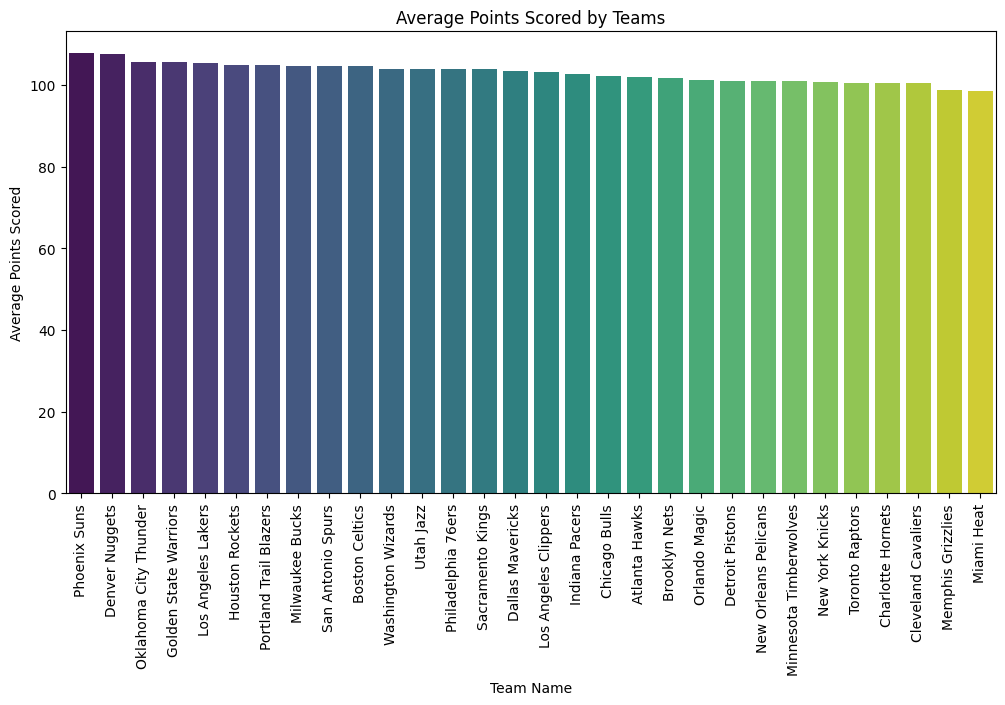

In [120]:
# Plot the average points scored by each team
plt.figure(figsize=(12, 6))
sns.barplot(x='full_name', y='avg_points_scored', data=team_performance_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Points Scored by Teams')
plt.xlabel('Team Name')
plt.ylabel('Average Points Scored')
plt.show()

Text(0.5, 1.0, 'Team Performance Trends Over Time')

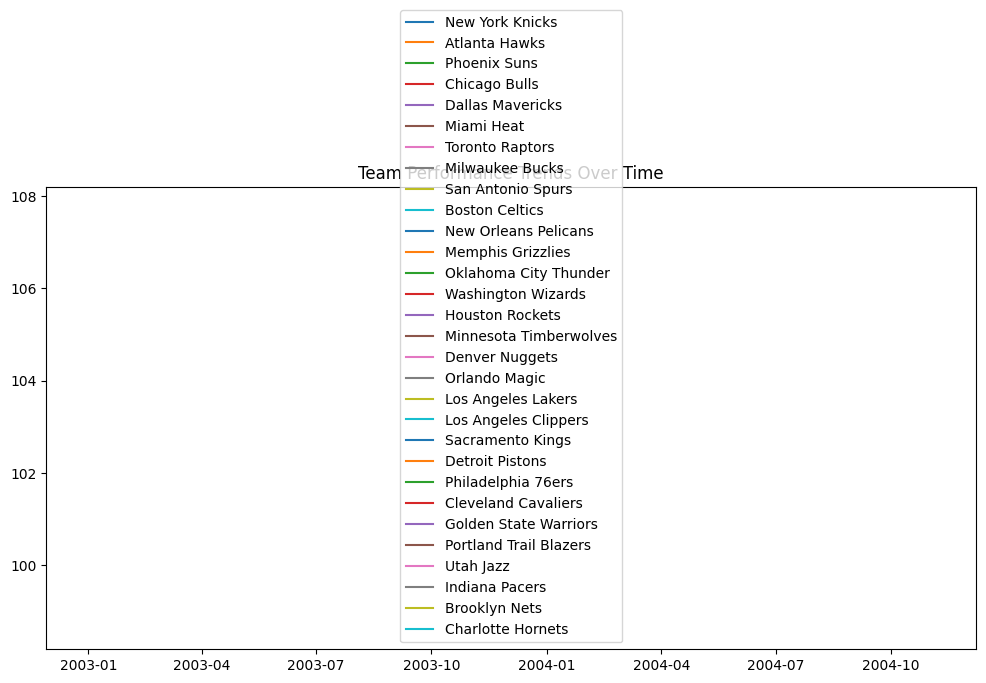

In [128]:
# Calculate performance trends over time
team_performance_df['game_date'] = pd.to_datetime(team_performance_df['game_date'])
team_performance_df = team_performance_df.sort_values(by='game_date')

plt.figure(figsize=(12, 6))
for team in team_performance_df['full_name'].unique():
    team_data = team_performance_df[team_performance_df['full_name'] == team]
    plt.plot(team_data['game_date'], team_data['avg_points_scored'], label=team)
plt.legend()
plt.title('Team Performance Trends Over Time')

In [129]:
# 1. Trend for a specific team
team_name = "San Antonio Spurs"  # Replace with the team you want to analyze
team_trend = team_performance_df[team_performance_df['full_name'] == team_name]
print(team_trend)

           full_name  avg_points_scored  avg_points_allowed  \
8  San Antonio Spurs         104.667425          101.583286   

   avg_point_difference  game_date  
8              3.084139 2003-01-03  
